In [38]:
data = []
with open('train.log', 'r+') as log_file:
    data = log_file.read().split('\n')

    
import re
def clean_num(digit):
    result = re.sub('[^0-9 | ^\.]','', digit)
    return float(result)

dis_loss = []
dis_acc = []

gen_loss = []
gen_acc = []

for line in data:
    line = line.split(" ")
    if len(line) < 6: continue
    epoch = line[0]

    dis_l, dis_a = clean_num(line[3]), clean_num(line[5])
    
    dis_loss.append(dis_l)
    dis_acc.append(dis_a)
    
    gen_l, gen_a = clean_num(line[-3]), clean_num(line[-1])
    gen_loss.append(gen_l)
    gen_acc.append(gen_a)

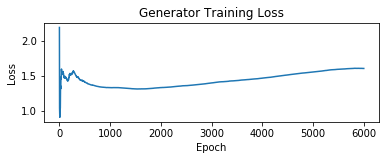

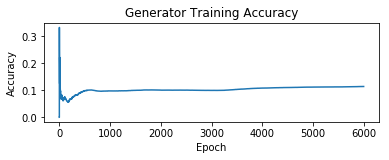

In [70]:
import numpy as np
import matplotlib.pyplot as plt

plt.subplot(2, 1, 2)
plt.plot(dis_loss)
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.title("Discriminator Training Loss")
plt.show()

plt.subplot(2, 1, 2)
plt.plot(dis_acc)
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.title("Discriminator Training Accuracy")
plt.show()



plt.subplot(2, 1, 2)
plt.plot(gen_loss)
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.title("Generator Training Loss")
plt.show()

plt.subplot(2, 1, 2)
plt.plot(gen_acc)
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.title("Generator Training Accuracy")
plt.show()
#plt.savefig("dis_train")

In [ ]:
import pandas as pd
import numpy as np

classes = ['saxophone',
        'raccoon',
        'piano',
        'panda',
        'leg',
        'headphones',
        'ceiling_fan',
        'bed',
        'basket',
        'aircraft_carrier']
channels = 1
img_size = 28
n_classes = 10
latent_dim = 100
batch_size = 32
learning_rate = .0002
b1 = .5
b2 = .999
sample_interval = 400
n_epochs = 2
img_shape = (channels, img_size, img_size)

df = pd.DataFrame([], columns=['Image', 'Label'])
for i, label in enumerate(classes):
    data = np.load('../data/%s.npy' % label) / 255
    data = np.reshape(data, [data.shape[0], img_size, img_size, 1])
    df2 = pd.DataFrame([(row, i) for row in data], columns=['Image', 'Label'])
    df = df.append(df2)
df.sample(frac=1)

In [7]:
real_imgs = df.sample(200)['Image']

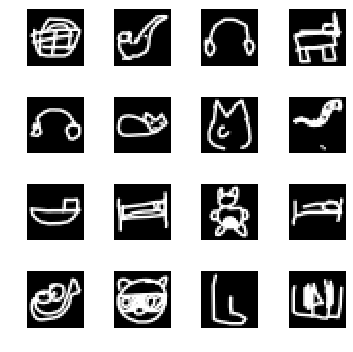

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
for k in range(16):
    plt.subplot(4, 4, k+1)
    plt.imshow(real_imgs.iloc[k].reshape((img_size, img_size)), cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()